<a href="https://colab.research.google.com/github/wali21009/EkstraksiWatershed_009_028/blob/main/Ekstraksi_Watershed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install opencv-python-headless

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Number of objects: 2


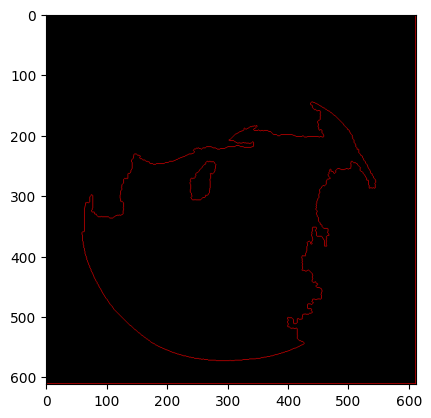

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("tomato.png")

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Thresholding
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Noise removal
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Mark the unknown region with 0
markers[unknown==255] = 0

# Apply watershed
markers = cv2.watershed(img, markers)

# Count the number of objects
num_objects = len(np.unique(markers)) - 1

# Display the number of objects
print("Number of objects:", num_objects)

# Display the mask image
mask = np.zeros(img.shape, dtype=np.uint8)
mask[markers == -1] = (0, 0, 255)

plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.show()